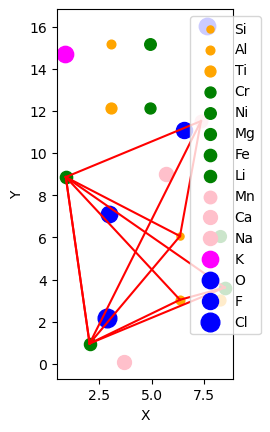

In [2]:
import matplotlib.pyplot as plt
from pymatgen.core import Lattice, Structure
from pymatgen.core.periodic_table import Element
import numpy as np

# Define lattice parameters for amphibole structure
a = 9.775
b = 18.2
c = 5.298
alpha = 90
beta = 105.8
gamma = 90

# Create a lattice
lattice = Lattice.from_parameters(a, b, c, alpha, beta, gamma)

# Basis atoms and their positions based on the provided site values
basis = [
    (Element("Si"), [0.675, 0.333, 0.25]),    # T(Si)
    (Element("Al"), [0.675, 0.167, 0.75]),    # T(Al)
    (Element("Ti"), [0.325, 0.667, 0.75]),    # T(Ti)
    (Element("Al"), [0.325, 0.833, 0.25]),    # C(Al)
    (Element("Ti"), [0.875, 0.167, 0.75]),    # C(Ti)
    (Element("Cr"), [0.525, 0.667, 0.75]),    # C(Cr)
    (Element("Ni"), [0.525, 0.833, 0.25]),    # C(Ni)
    (Element("Mg"), [0.875, 0.333, 0.25]),    # C(Mg)
    (Element("Fe"), [0.099, 0.487, 0.744]),   # C(Fe2+)
    (Element("Li"), [0.219, 0.053, 0.677]),   # C(Li)
    (Element("Mn"), [0.781, 0.633, 0.222]),   # B(Mn2+)
    (Element("Fe"), [0.901, 0.199, 0.155]),   # B(Fe2+)
    (Element("Ca"), [0.391, 0.005, 0.583]),   # B(Ca)
    (Element("Na"), [0.605, 0.495, 0.389]),   # B(Na)
    (Element("K"), [0.095, 0.809, 0.000]),    # A(K)
    (Element("O"), [0.809, 0.881, 0.512]),    # W(OH)
    (Element("F"), [0.693, 0.609, 0.485]),    # W(F)
    (Element("Cl"), [0.307, 0.119, 0.001]),   # W(Cl)
    (Element("O"), [0.315, 0.391, 0.985])     # W(O2-)
]

# Ionic radii for the elements
ionic_radii = {
    "Si": 0.26,
    "Al": 0.39,
    "Ti": 0.61,
    "Cr": 0.62,
    "Ni": 0.69,
    "Mg": 0.72,
    "Fe": 0.78,
    "Li": 0.76,
    "Mn": 0.81,
    "Ca": 1.00,
    "Na": 1.02,
    "K": 1.38,
    "O": 1.40,
    "F": 1.33,
    "Cl": 1.81
}

# Scale factor for visualizing ionic radii
scale_factor = 100

# Create a Structure object
structure = Structure(lattice, [atom[0] for atom in basis], [atom[1] for atom in basis])

# Project the 3D coordinates to 2D by ignoring the z-coordinate
projected_coords = [(site.coords[0], site.coords[1]) for site in structure]
elements = [site.specie.symbol for site in structure]

# Visualization using matplotlib
fig, ax = plt.subplots()

# Define colors for elements
colors = {
    "Si": "orange",
    "Al": "orange",
    "Ti": "orange",
    "Cr": "green",
    "Ni": "green",
    "Mg": "green",
    "Fe": "green",
    "Li": "green",
    "Mn": "pink",
    "Ca": "pink",
    "Na": "pink",
    "K": "magenta",
    "O": "blue",
    "F": "blue",
    "Cl": "blue"
}

# Plot the atoms with sizes proportional to their ionic radii
for (x, y), element in zip(projected_coords, elements):
    size = ionic_radii[element] * scale_factor
    ax.scatter(x, y, color=colors[element], s=size, label=element)

# Define tetrahedrons by connecting elements
tetrahedrons = [
    [projected_coords[0], projected_coords[8], projected_coords[9], projected_coords[10]],  # Example tetrahedron
    [projected_coords[1], projected_coords[8], projected_coords[9], projected_coords[11]]   # Example tetrahedron
]

for tetra in tetrahedrons:
    vertices = np.array(tetra)
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            ax.plot(*zip(vertices[i], vertices[j]), color='r')

# Create a unique legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the aspect ratio
ax.set_aspect('equal')

# Set the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Remove the grid
ax.grid(False)

plt.show()
